In [1]:
%matplotlib notebook

import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation

from ipywidgets import interact,interactive
import ipywidgets as widgets

from IPython.display import HTML

global global_K1
global global_K2
global global_branche

In [2]:
def get_closest_point(clic_x,clic_y):
    # Get the data from the figure
    ax= plt.gca() # get axis handle
    acoustic_data = ax.lines[1]
    optic_data = ax.lines[0]

    # Find which line was closer
    #closet x data
    k_a = acoustic_data.get_xdata()
    k_o = optic_data.get_xdata()
    diff_k_a = np.abs(k_a-clic_x)
    diff_k_o = np.abs(k_o-clic_x)
    # get the x index corresponding to the closet k in the graph for both branches
    index_a = np.argmin(diff_k_a)
    index_o = np.argmin(diff_k_o)

    # compute the distance on the y axis
    y_diff_a = np.abs(acoustic_data.get_ydata()[index_a]-clic_y)
    y_diff_o = np.abs(optic_data.get_ydata()[index_o]-clic_y)

    ac_is_closer = y_diff_a<y_diff_o
    # print a x at the postion 
    global global_branche
    if(ac_is_closer):
        global_branche=1
        return [acoustic_data.get_xdata()[index_a], acoustic_data.get_ydata()[index_a]]
    else:
        global_branche=2
        return [optic_data.get_xdata()[index_a], optic_data.get_ydata()[index_a]]


    
    
def interactive_lattice_plot(G,K):
    '''
    :param G,K: coupling
    plot acoustic and optical phonons bands
    '''
    
    # save the current values of G and K
    global global_K1
    global global_K2
    global_K1=G
    global_K2=K
    
    plt.close()
    fig=plt.figure()

    k = np.linspace(-np.pi/2,np.pi/2,100)

    omega_o = G+K-np.sqrt((G+K)**2-4*G*K*np.sin(k)**2)
    omega_a = G+K+np.sqrt((G+K)**2-4*G*K*np.sin(k)**2)
    
    ax1=plt.gca()
    ax1.plot(k,np.sqrt(omega_a))
    ax1.plot(k,np.sqrt(omega_o))
    ax1.set_xlabel("k")
    ax1.set_ylabel("omega")
    
   
    def onclick(event):    
        ax1=plt.gca()
        # clear the previous point 
        for i in np.arange(3, len(ax1.lines)+1) :
            ax1.lines.pop()
        # Get the coordonate of the data closest from the click
        [x,y]=get_closest_point(event.xdata,event.ydata)
        ax1.plot(x, y, '.',color='red')
    
    cid = fig.canvas.mpl_connect('button_press_event', onclick)
    plt.show()



In [3]:
interactive_plot = interactive(interactive_lattice_plot, G=(1, 6.0), K=(1, 6.0))
interactive_plot


interactive(children=(FloatSlider(value=3.5, description='G', max=6.0, min=1.0), FloatSlider(value=3.5, descri…

<IPython.core.display.Javascript object>


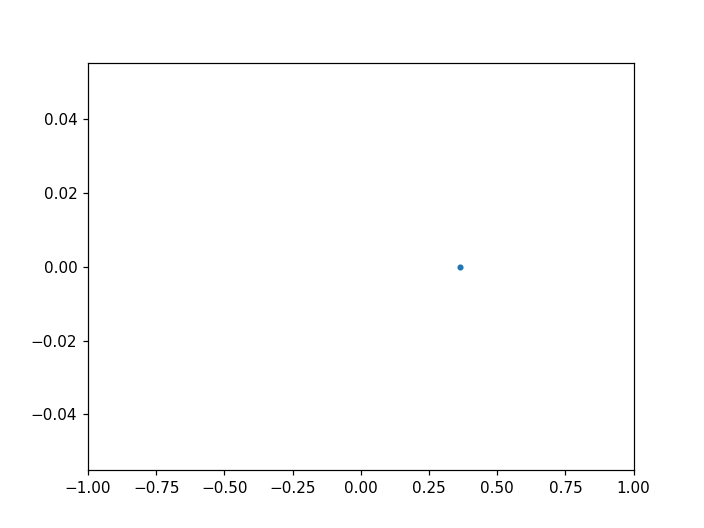

In [7]:
fig = plt.figure()
ax = plt.axes()
ax.set_xlim([-1,1])
line, = ax.plot([], [], ".")

# Initialization function: plot the background of each frame
def init():
    line.set_data([], [])
    return line,

# Animation function which updates figure data.  This is called sequentially
def animate(t):
    b = 1
    a = 1
    line.set_data(np.sin(0.001*t), 0)
    return line,

# Call the animator.  blit=True means only re-draw the parts that have changed.
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=10000, interval=1, blit=True)

